<a href="https://colab.research.google.com/github/PIRATES7376/Computer-Vision-and-Pattern-Recognition--CVPR/blob/main/webcam__digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load necessary packages**

In [88]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

**Load dataset**

In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


**Display images**

Image (#9): Which is digit '4'


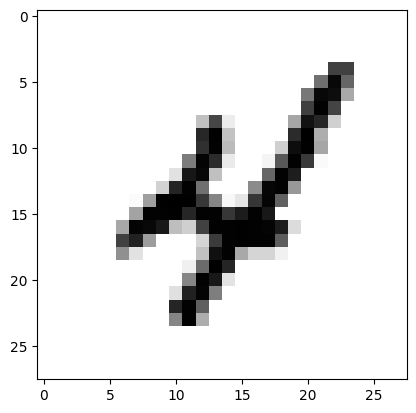

In [90]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

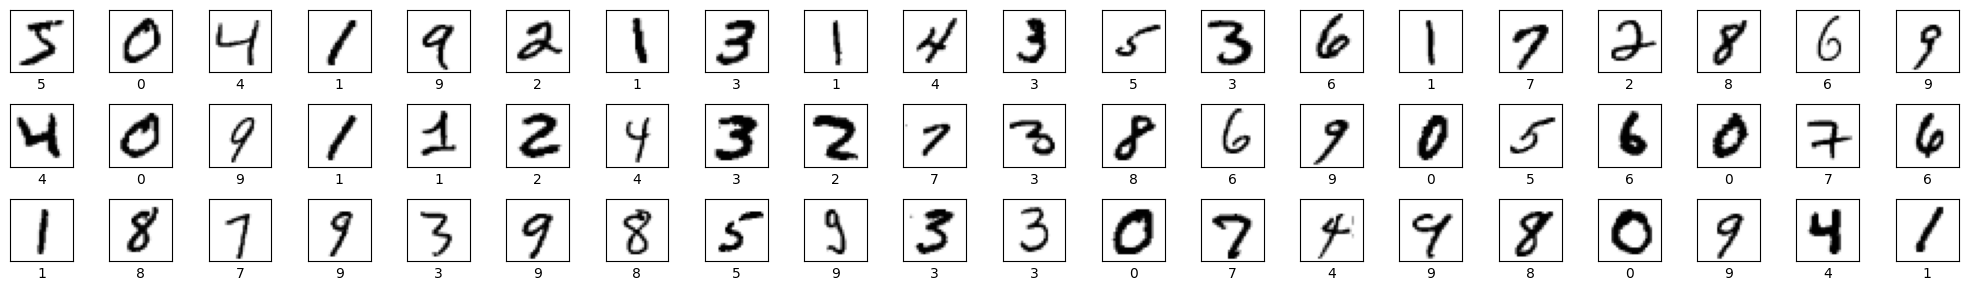

In [91]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

**Normalise data**

In [92]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

Image (#915): Which is digit '5'


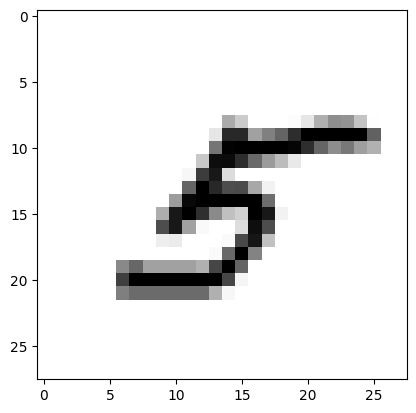

In [93]:
digit = 915 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

**Build the model**

In [94]:
model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

**Compile the model**

In [95]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Train the model**

In [96]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8568 - loss: 0.4946 - val_accuracy: 0.9504 - val_loss: 0.1648
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9665 - loss: 0.1107 - val_accuracy: 0.9589 - val_loss: 0.1312
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9793 - loss: 0.0672 - val_accuracy: 0.9716 - val_loss: 0.0962
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9712 - val_loss: 0.1079
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9712 - val_loss: 0.1004


**Plot the training results**

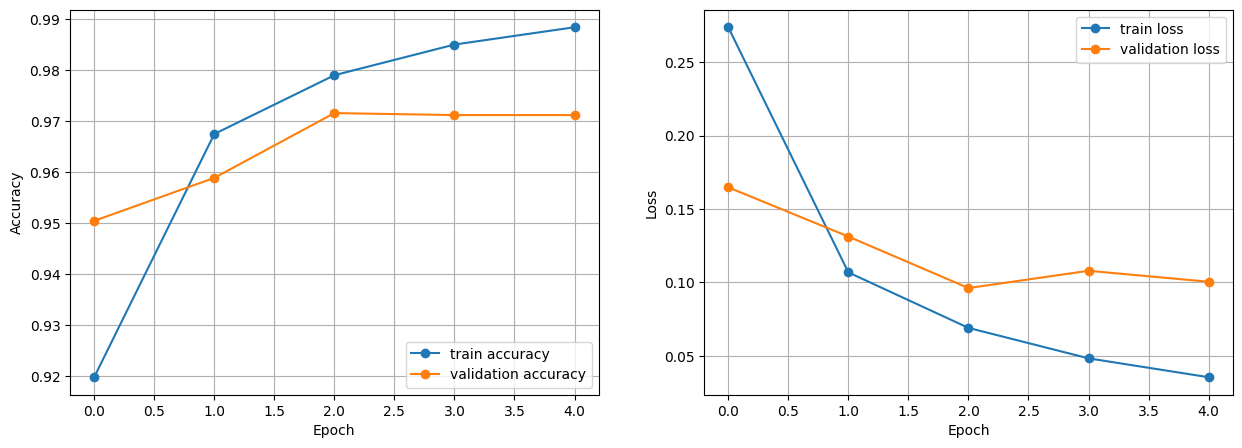

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


**Evaluate the model on the test dataset**

In [98]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.0940

Test accuracy: 0.9757000207901001


**Make predictions on the entire test images**

In [99]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


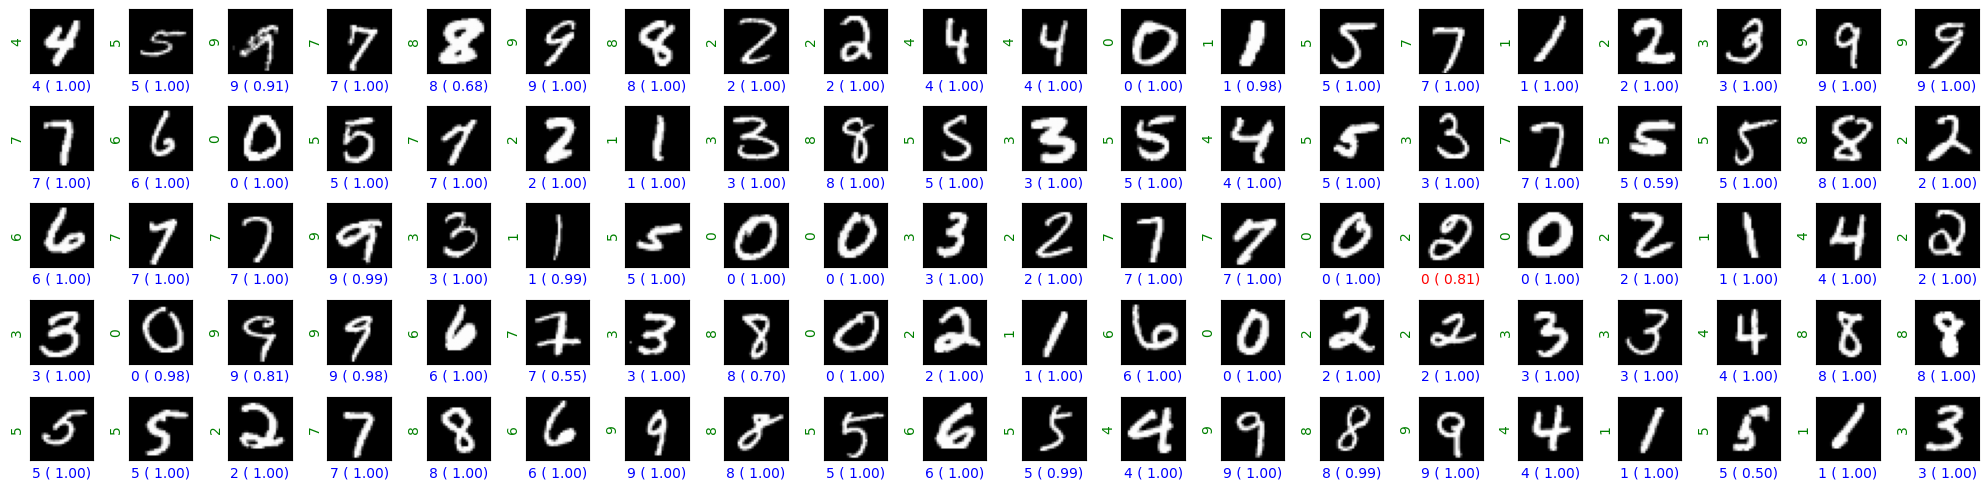

In [100]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1

plt.tight_layout()
plt.show()

**Predict a single image**

In [101]:
def test(i):
    img = x_test[i]
    predictions = model.predict([img.reshape(-1,784)])

    plt.figure()
    plt.imshow(img.reshape(28,28), cmap='gray_r')
    plt.xticks([])
    plt.yticks([])

    plt.ylabel(f"True Label: {y_test[i]}", color='g') # ground truth

    prediction = np.argmax(predictions)
    confidence = predictions[0][prediction]

    if y_test[i] == prediction:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='b')
    else:
        plt.xlabel(f"prediction = {prediction} (Confidence Score = {confidence: .2f})", color='r')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_170
Received: inputs=('Tensor(shape=(1, 784))',)
  warnings.warn(msg)


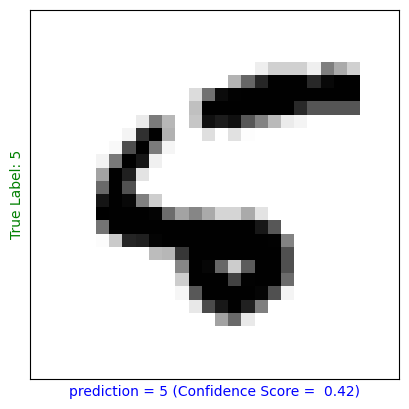

In [102]:
test(8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


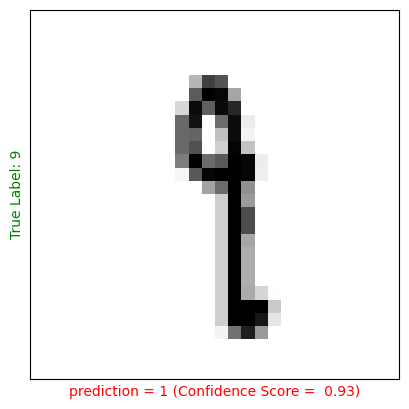

In [103]:
test(4500)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


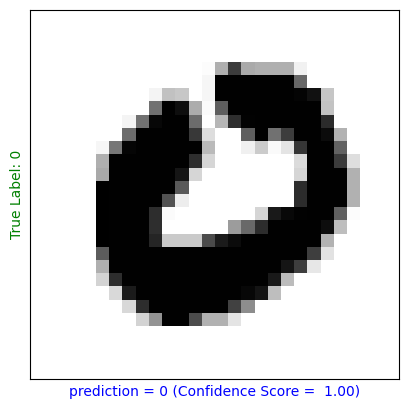

In [104]:
test(25)

**After build and train model Saved**

In [105]:
lenet = model
# Save the trained model in Keras native format with new name
lenet.save('my_model.keras')
print("Model saved as 'my_model.keras'")

Model saved as 'my_model.keras'


**Load The Model**

In [106]:
import tensorflow as tf
model = tf.keras.models.load_model('my_model.keras')
print("Model loaded successfully")

Model loaded successfully


**saved model file uploaded from another workspace need this part**

In [ ]:
from google.colab import files
up = files.upload()  # pick your .keras (or .h5); it will upload to the notebook's CWD

import tensorflow as tf
from tensorflow import keras

# Prefer exact filename you uploaded:
MODEL_PATH = [k for k in up.keys() if k.endswith(('.keras', '.h5'))][0]
model = keras.models.load_model(MODEL_PATH)
# After you have: model = keras.models.load_model(MODEL_PATH)

import numpy as np
from PIL import Image

def adapt_for_model(arr28, model):
    """
    arr28: float32 array in [0,1], shape (28, 28)
    Returns x shaped to match model.input_shape:
      - (None, 784)   -> reshape to (1, 784)
      - (None, 28, 28, 1) -> reshape to (1, 28, 28, 1)
      - (None, 28, 28, 3) -> replicate channel to (1, 28, 28, 3)
      - (None, 28, 28)    -> (1, 28, 28)
    """
    inp_shape = model.input_shape
    # If multiple inputs, take the first
    if isinstance(inp_shape, (list, tuple)) and isinstance(inp_shape[0], (list, tuple)):
        inp_shape = inp_shape[0]

    # Examples: (None, 784) or (None, 28, 28, 1)
    if len(inp_shape) == 2:  # (None, D)
        return arr28.reshape(1, -1).astype(np.float32)
    elif len(inp_shape) == 3:  # (None, H, W)
        return arr28[None, ...].astype(np.float32)
    elif len(inp_shape) == 4:  # (None, H, W, C)
        C = inp_shape[-1]
        if C in (1, None):
            return arr28[None, ..., None].astype(np.float32)
        elif C == 3:
            rgb = np.stack([arr28, arr28, arr28], axis=-1)  # grayscale -> 3-ch
            return rgb[None, ...].astype(np.float32)
        else:
            raise ValueError(f"Unsupported channel count in model input: {inp_shape}")
    else:
        # Fallback: flatten
        return arr28.reshape(1, -1).astype(np.float32)

print("Loaded model:", MODEL_PATH)


Saving my_model.keras to my_model (1).keras
Loaded model: my_model (1).keras


**Java Script For Webcam**

In [107]:
import io, base64
from PIL import Image
from IPython.display import display, Javascript
from google.colab import output

JS = r"""
async function capture() {
  const div = document.createElement('div');
  const video = document.createElement('video');
  const btn = document.createElement('button');
  const status = document.createElement('span');
  btn.textContent = '📸 Capture'; btn.style.margin = '8px';
  status.style.marginLeft = '8px';
  status.textContent = 'Allow camera, then click Capture.';
  div.appendChild(video); div.appendChild(document.createElement('br'));
  div.appendChild(btn); div.appendChild(status);
  document.body.appendChild(div);

  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  video.srcObject = stream; await video.play();
  await new Promise(resolve => btn.onclick = resolve);

  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth; canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);

  stream.getVideoTracks()[0].stop(); div.remove();
  return canvas.toDataURL('image/png');
}
"""

def take_photo():
  display(Javascript(JS))
  data_url = output.eval_js('capture()')
  png_bytes = base64.b64decode(data_url.split(',')[1])
  img = Image.open(io.BytesIO(png_bytes)).convert('RGB')
  return np.array(img)  # HxWx3 uint8 (RGB)


**Real-Time Handwritten Digit Capture, Preprocessing, and Classification (MNIST Camera Inference Pipeline)**

In [108]:
import numpy as np
from PIL import Image

INVERT = True         # keep True for white-on-black MNIST target
ROI_FRACTION = 0.6    # keep your digit near the center of the frame

def to_gray(rgb):
  r,g,b = rgb[...,0], rgb[...,1], rgb[...,2]
  return (0.299*r + 0.587*g + 0.114*b).astype(np.uint8)

def otsu(gray):
  hist,_ = np.histogram(gray, bins=256, range=(0,256))
  total = gray.size
  sum_total = np.dot(np.arange(256), hist)
  sum_b = 0.0; w_b = 0; var_max = 0.0; thresh = 0
  for t in range(256):
    w_b += hist[t]
    if w_b == 0: continue
    w_f = total - w_b
    if w_f == 0: break
    sum_b += t * hist[t]
    m_b = sum_b / w_b
    m_f = (sum_total - sum_b) / w_f
    var_between = w_b * w_f * (m_b - m_f)**2
    if var_between > var_max:
      var_max = var_between; thresh = t
  return (gray > thresh).astype(np.uint8) * 255

def largest_component_bbox(bin_img):
  h,w = bin_img.shape
  visited = np.zeros((h,w), bool)
  best_area, best = 0, None
  stack = []
  for y in range(h):
    for x in range(w):
      if bin_img[y,x]==255 and not visited[y,x]:
        stack[:] = [(y,x)]; visited[y,x]=True
        miny=maxy=y; minx=maxx=x; area=0
        while stack:
          cy,cx = stack.pop(); area+=1
          if cy<miny: miny=cy
          if cy>maxy: maxy=cy
          if cx<minx: minx=cx
          if cx>maxx: maxx=cx
          for dy,dx in ((1,0),(-1,0),(0,1),(0,-1)):
            ny,nx = cy+dy, cx+dx
            if 0<=ny<h and 0<=nx<w and bin_img[ny,nx]==255 and not visited[ny,nx]:
              visited[ny,nx]=True; stack.append((ny,nx))
        if area>best_area:
          best_area=area; best=(minx,miny,maxx,maxy)
  return best

def preprocess(frame_rgb):
  H,W,_ = frame_rgb.shape
  # center crop
  fh, fw = int(H*ROI_FRACTION), int(W*ROI_FRACTION)
  y0 = (H - fh)//2; x0 = (W - fw)//2
  roi = frame_rgb[y0:y0+fh, x0:x0+fw, :]

  gray = to_gray(roi)
  th = otsu(gray)
  if INVERT:
    th = 255 - th

  bbox = largest_component_bbox(th)
  if bbox is None:
    return None, None

  x0,y0,x1,y1 = bbox
  digit = th[y0:y1+1, x0:x1+1]

  # Scale longest side -> 20, then center on 28×28 (MNIST convention)
  h,w = digit.shape
  if h >= w:
    new_h, new_w = 20, max(1, int(round(w*(20.0/h))))
  else:
    new_w, new_h = 20, max(1, int(round(h*(20.0/w))))
  small = Image.fromarray(digit).resize((new_w, new_h), Image.Resampling.BILINEAR)

  canvas = Image.new("L", (28,28), 0)
  arr_small = (np.array(small) > 0).astype(np.float32)
  if arr_small.any():
    yy, xx = np.nonzero(arr_small)
    cy, cx = yy.mean(), xx.mean()
  else:
    cy, cx = small.size[1]/2, small.size[0]/2

  paste_x = int(round(14 - cx))
  paste_y = int(round(14 - cy))
  canvas.paste(small, (paste_x, paste_y))

  arr28 = np.asarray(canvas).astype(np.float32) / 255.0  # (28,28)
  return arr28, canvas
def predict_once():
  frame = take_photo()
  arr28, canvas = preprocess(frame)   # arr28 is (28,28) float32
  if arr28 is None:
    print("No digit detected. Keep it centered and high-contrast.")
    return
  x = arr28.reshape(1, 784).astype(np.float32)  # match (None, 784)
  probs = model.predict(x, verbose=0)[0]
  top = np.argsort(probs)[::-1][:3]
  display(canvas.resize((140,140), Image.NEAREST))
  print("Top-3:", [(int(i), float(probs[i])) for i in top])


**Capture and Predict Digit**

<IPython.core.display.Javascript object>

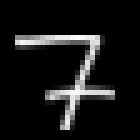

Top-3: [(7, 0.9678428769111633), (2, 0.03129918873310089), (3, 0.0005523510044440627)]


In [110]:
predict_once()
